In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(158, 10)


In [5]:
data1=data.drop(["Unnamed: 0","Temp C"],axis=1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [7]:
data1[data1.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [8]:
data1.drop_duplicates(keep='first',inplace=True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [9]:
data1.rename({'Solar.R':'Solar'},axis=1,inplace=True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


Impute the missing values

In [11]:
#Display data1 missing values count in each column using isnull().sum()
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

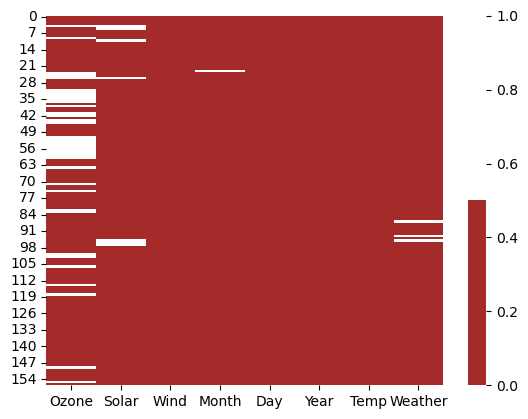

In [12]:
cols=data1.columns
colors=['brown','white']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar=True)

In [13]:
median_ozone=data1["Ozone"].median()
mean_ozone=data1["Ozone"].mean()
print("Median of Ozone: ",median_ozone)
print("Mean of Ozone: ",mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [14]:
data1['Ozone']=data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [15]:
median_Solar=data1["Solar"].median()
mean_Solar=data1["Solar"].mean()
print("Median of Solar: ",median_Solar)
print("Mean of Solar: ",mean_Solar)
data1['Solar']=data1['Solar'].fillna(mean_Solar)
data1.isnull().sum()

Median of Solar:  199.0
Mean of Solar:  185.36666666666667


Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [16]:
print(data1["Weather"].value_counts())
mode_Weather = data1["Weather"].mode()[0]
print(mode_Weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [17]:
data1["Weather"] = data1["Weather"].fillna(mode_Weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [18]:
print(data1["Month"].value_counts())
mode_Month = data1["Month"].mode()[0]
print(mode_Month)
data1["Month"] = data1["Month"].fillna(mode_Month)
data1.isnull().sum()

Month
9.0    33
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

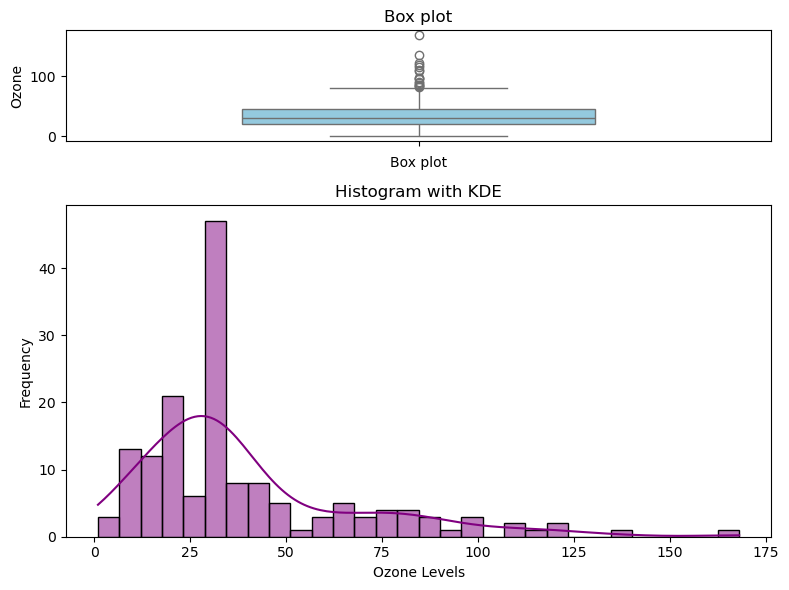

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})


sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5)
axes[0].set_title("Box plot")
axes[0].set_xlabel("Box plot")

sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")


plt.tight_layout()

plt.show()


Observations
 The ozone column has extreme has extreme values beyond 81 as seen from box plot
 The same is confirmed from the below right_skewed histogram

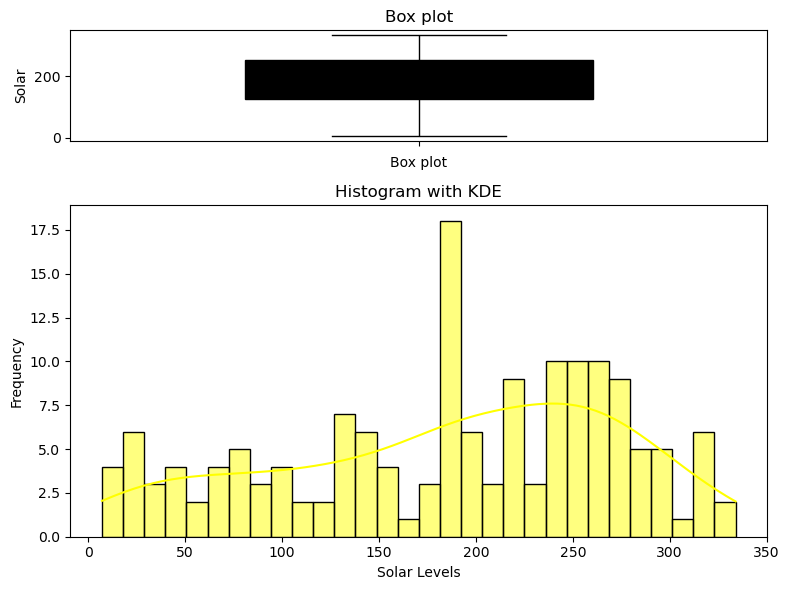

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})


sns.boxplot(data=data1["Solar"], ax=axes[0], color='black', width=0.5)
axes[0].set_title("Box plot")
axes[0].set_xlabel("Box plot")

sns.histplot(data1["Solar"], kde=True, ax=axes[1], color='yellow', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")


plt.tight_layout()

plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1fa7a8ce4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa7a9ee990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa7a9b7dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa7aa18560>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa7aa187a0>],
 'means': []}

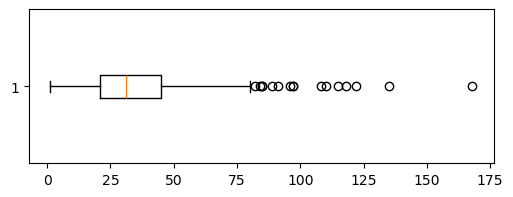

In [22]:
plt.figure(figsize=(6,2))
plt.boxplot(data1["Ozone"],vert=False)

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

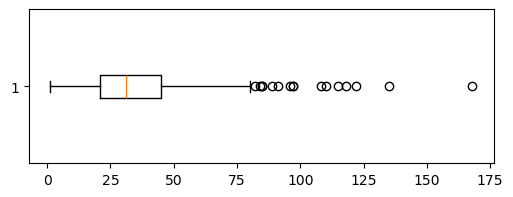

In [23]:
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"],vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

In [24]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [25]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]
for x in data1["Ozone"]:
    if((x < (mu - 3*sigma)) or (x > (mu - 3*sigma))):
        print(x)

41.0
36.0
12.0
18.0
31.0
28.0
23.0
19.0
8.0
31.0
7.0
16.0
11.0
14.0
18.0
14.0
34.0
6.0
30.0
11.0
1.0
11.0
4.0
32.0
31.0
31.0
31.0
23.0
45.0
115.0
37.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
31.0
71.0
39.0
31.0
31.0
23.0
31.0
31.0
21.0
37.0
20.0
12.0
13.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
135.0
49.0
32.0
31.0
64.0
40.0
77.0
97.0
97.0
85.0
31.0
10.0
27.0
31.0
7.0
48.0
35.0
61.0
79.0
63.0
16.0
31.0
31.0
80.0
108.0
20.0
52.0
82.0
50.0
64.0
59.0
39.0
9.0
16.0
78.0
35.0
66.0
122.0
89.0
110.0
31.0
31.0
44.0
28.0
65.0
31.0
22.0
59.0
23.0
31.0
44.0
21.0
9.0
31.0
45.0
168.0
73.0
31.0
76.0
118.0
84.0
85.0
96.0
78.0
73.0
91.0
47.0
32.0
20.0
23.0
21.0
24.0
44.0
21.0
28.0
9.0
13.0
46.0
18.0
13.0
24.0
16.0
13.0
23.0
36.0
7.0
14.0
30.0
31.0
14.0
18.0
20.0
41.0
30.0
31.0
18.0


C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_10448\1214206184.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_10448\1214206184.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Text(0.5, 0, 'Theorerctical quantiles')

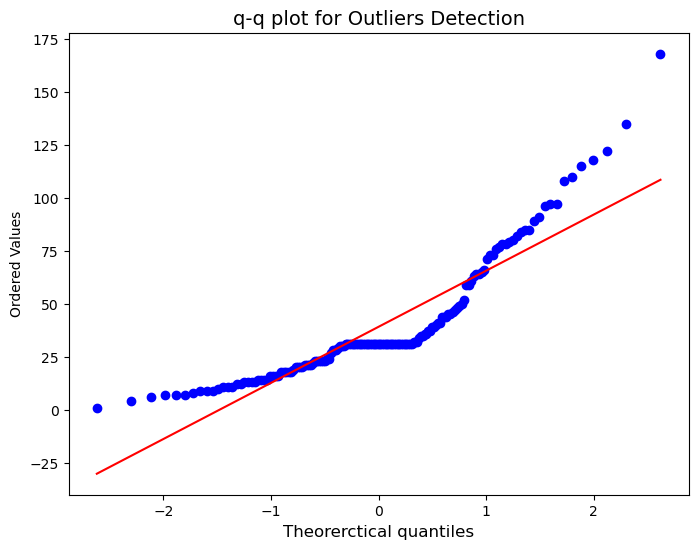

In [26]:
import scipy .stats as stats
plt.figure(figsize=(8,6))
stats.probplot(data1["Ozone"],dist="norm",plot=plt)
plt.title("q-q plot for Outliers Detection",fontsize=14)
plt.xlabel("Theorerctical quantiles",fontsize=12)

Observations from q-q plot
*the data does not follow normal distribution as the data points are deviating 
significantly away from the red line
*the data shows a right-skewed distribution and possible outliers

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

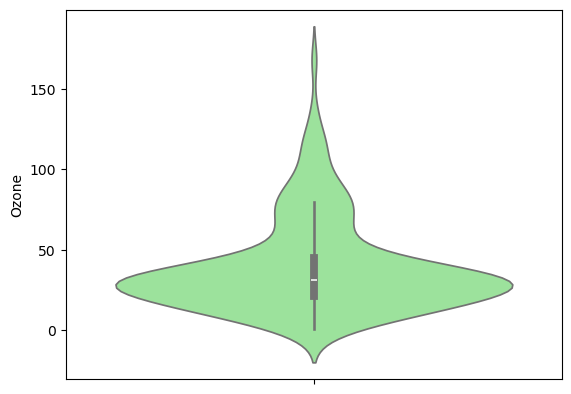

In [28]:
sns.violinplot(data=data1["Ozone"],color='lightgreen')
plt.title

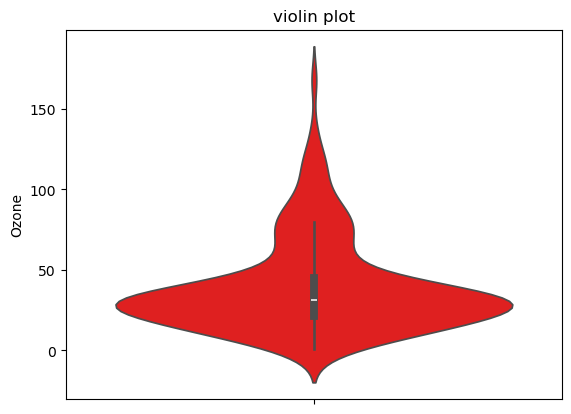

In [30]:
sns.violinplot(data=data1["Ozone"],color='red')
plt.title("violin plot")
plt.show()

C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_10448\2117052062.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

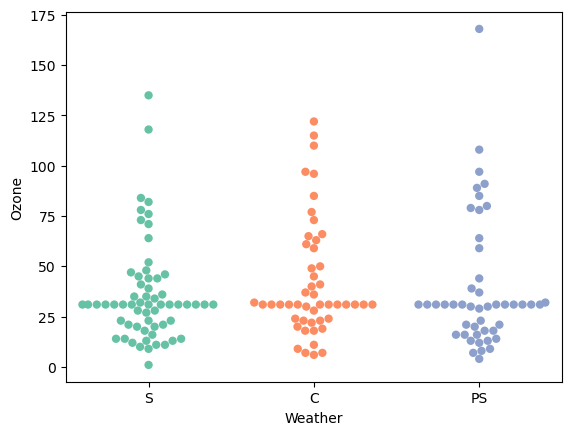

In [34]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2",size=6)


C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_10448\3258416253.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set1",size=6,jitter=True)


<Axes: xlabel='Weather', ylabel='Ozone'>

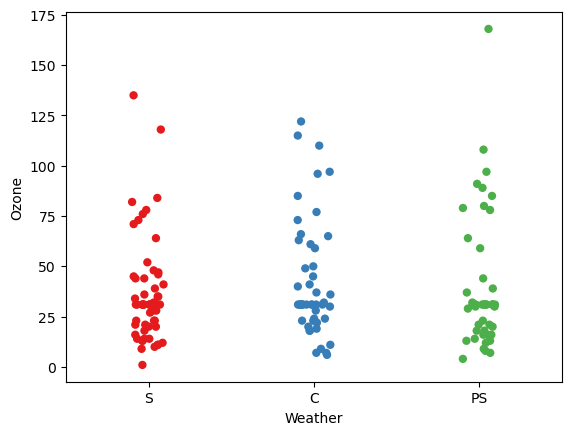

In [36]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set1",size=6,jitter=True)

<Axes: xlabel='Ozone', ylabel='Density'>

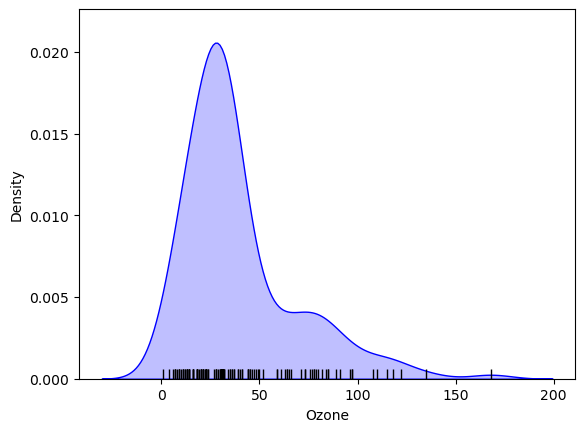

In [44]:
sns.kdeplot(data=data1["Ozone"],fill=True,color="blue")
sns.rugplot(data=data1["Ozone"],color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

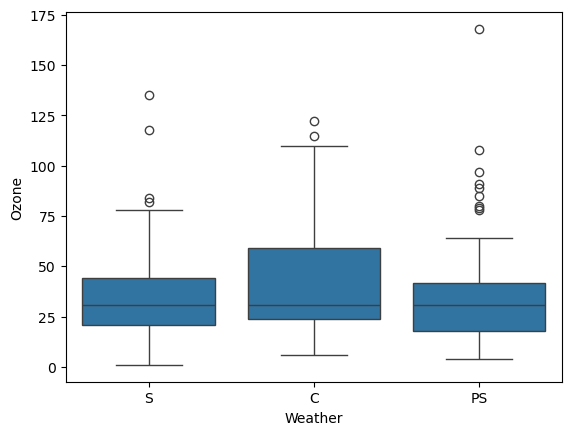

In [52]:
sns.boxplot(data=data1,x="Weather",y="Ozone")

# Correlation coefficient and pair plots

In [1]:
plt.scatter(data1["Wind"],data1["Temp"])

NameError: name 'plt' is not defined

In [63]:
# compute pearson correlation coefficient
# between wind speed and tempareture

In [65]:
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

In [69]:
# read all n umeric columns into a new table
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.000000,7.4,67
1,36.0,118.000000,8.0,72
2,12.0,149.000000,12.6,74
3,18.0,313.000000,11.5,62
4,31.0,185.366667,14.3,56
...,...,...,...,...
152,20.0,223.000000,11.5,68
153,41.0,190.000000,7.4,67
154,30.0,193.000000,6.9,70
155,31.0,145.000000,13.2,77
